## Jupyter Notebook Exploratory Data Analysis Example

Originally created by Carlos Lizarraga on 11-01-2022

Edited by Kiana Martinez

Save the Jupyter Notebook into your defined working directory.

Use this Docker [Jupyter Base Notebook](https://hub.docker.com/r/jupyter/base-notebook) to run this notebook.

Use: `docker pull jupyter/base-notebook`to download this Docker image to your computer.

Then execute: `docker run -it --rm -v "${PWD}":/home/jovyan/work -p 8888:8888 jupyter/base-notebook` 

The Docker container wil run in your default browser tab.

Your `$HOME` directory will be mapped into the `/work`directory inside your Jupyter Notebook environment.



In [1]:
# See if seaborn is installed
import seaborn as sns

sns.__version__

'0.12.0'

In [5]:
# Using the `pip` command install the latest Seaborn library and dependencies for this Jupyter Notebook
# Seaborn version greater than 0.12 is needed.
!pip install seaborn==0.12.0

# Load Seaborn into working memory
import seaborn as sns

# Prints the version of Seaborn
sns.__version__

  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


'0.11.2'

In [5]:
# Import necessary Python libraries
import numpy as np
import matplotlib.pyplot as plt

# Will use this Seaborn.objects
import seaborn.objects as so

import pandas as pd
#import sidetable

# SHIF+ENTER to execute cells

In [6]:
# Seaborn includes sample datasets
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [16]:
# Load Titanic dataset
df0 = sns.load_dataset('titanic')
df0.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [17]:
# Print dataframe information
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [18]:
# Print numer of missing values
df0.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [19]:
# Make a copy of original dataframe and create new working dataframe
df1 = df0.copy()

# Drop rwos with missing values
df1 = df1.dropna()

# Show dataframe information
df1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 1 to 889
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     182 non-null    int64   
 1   pclass       182 non-null    int64   
 2   sex          182 non-null    object  
 3   age          182 non-null    float64 
 4   sibsp        182 non-null    int64   
 5   parch        182 non-null    int64   
 6   fare         182 non-null    float64 
 7   embarked     182 non-null    object  
 8   class        182 non-null    category
 9   who          182 non-null    object  
 10  adult_male   182 non-null    bool    
 11  deck         182 non-null    category
 12  embark_town  182 non-null    object  
 13  alive        182 non-null    object  
 14  alone        182 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 18.2+ KB


In [20]:
# Descriptive Statistics of numeric variables
df1.describe()

,survived,pclass,age,sibsp,parch,fare
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,0.675824,1.192308,35.623187,0.467033,0.478022,78.919735
std,0.469357,0.516411,15.671615,0.645007,0.755869,76.490774
min,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,1.000000,1.000000,47.750000,1.000000,1.000000,90.000000
max,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [27]:
# Descriptive statistocs of categorical variables
df1[ ['sex', 'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone']].describe() 

,sex,class,who,adult_male,embark_town,alive,alone
count,182,182,182,182,182,182,182
unique,2,3,3,2,3,2,2
top,male,First,man,False,Southampton,yes,False
freq,94,157,87,95,115,123,104


## Data visualization with Seaborn

**References**
- [Seaborn documentation](https://seaborn.pydata.org/tutorial/introduction.html)
- [Seaborn.objects documentation](https://seaborn.pydata.org/generated/seaborn.objects.Plot.html#)
- [Data Visualization with Python](https://github.com/clizarraga-UAD7/Workshops/wiki/Data-Visualization-with-Python)
- [Data Visualization with Python - Jupyter Notebook Example](https://github.com/clizarraga-UAD7/Notebooks/blob/main/Data_Visualization_with_Python2.ipynb)


In [28]:
# Redefine working dataframe to df
df = df1.copy()

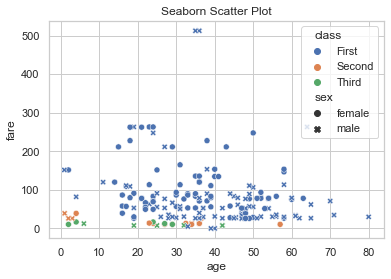

In [32]:
# Seaborn 

#define figure size and Seaborn style
sns.set(rc={"figure.figsize":(6, 4)}) #width=12, height=8
sns.set_style("whitegrid")

# Scatterplot
sns.scatterplot(data=df, x="age", y="fare", hue="class", style="sex").set(
    xlabel="age", ylabel="fare", title="Seaborn Scatter Plot");


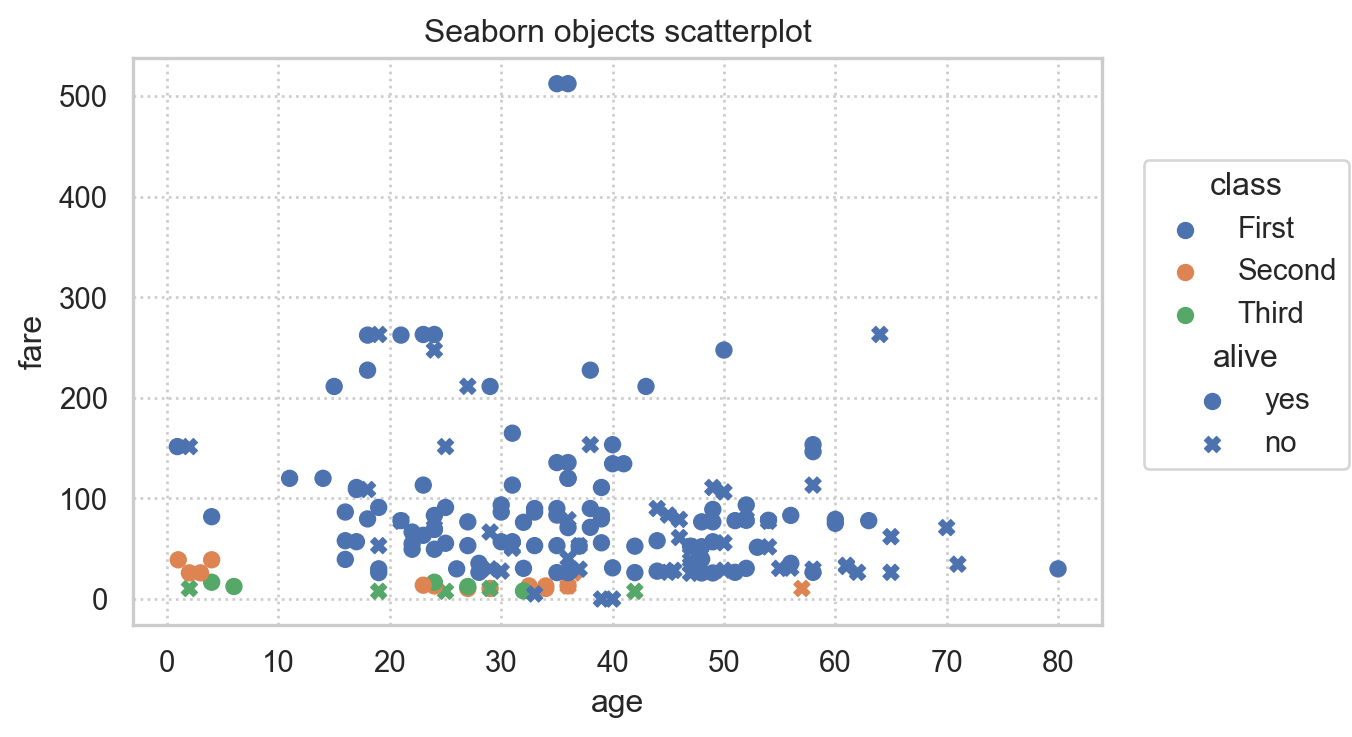

In [48]:
# With Seaborn objects
from seaborn import axes_style
    
(
    so.Plot(
        df, x="age", y="fare", color="class", marker="alive"
    )
    .add(so.Dot()).layout(size=(6, 4)).theme({**axes_style("whitegrid"), "grid.linestyle": ":"})
    .label(
        x="age", y="fare",title="Seaborn objects scatterplot"
    )
)

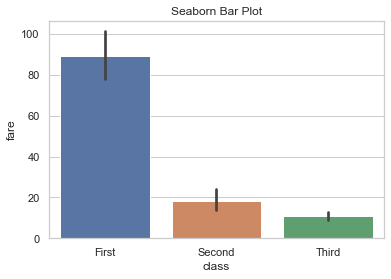

In [40]:

# Using Seaborn barplot

sns.barplot(x=df['class'],y=df['fare']).set(ylabel="fare", title="Seaborn Bar Plot");



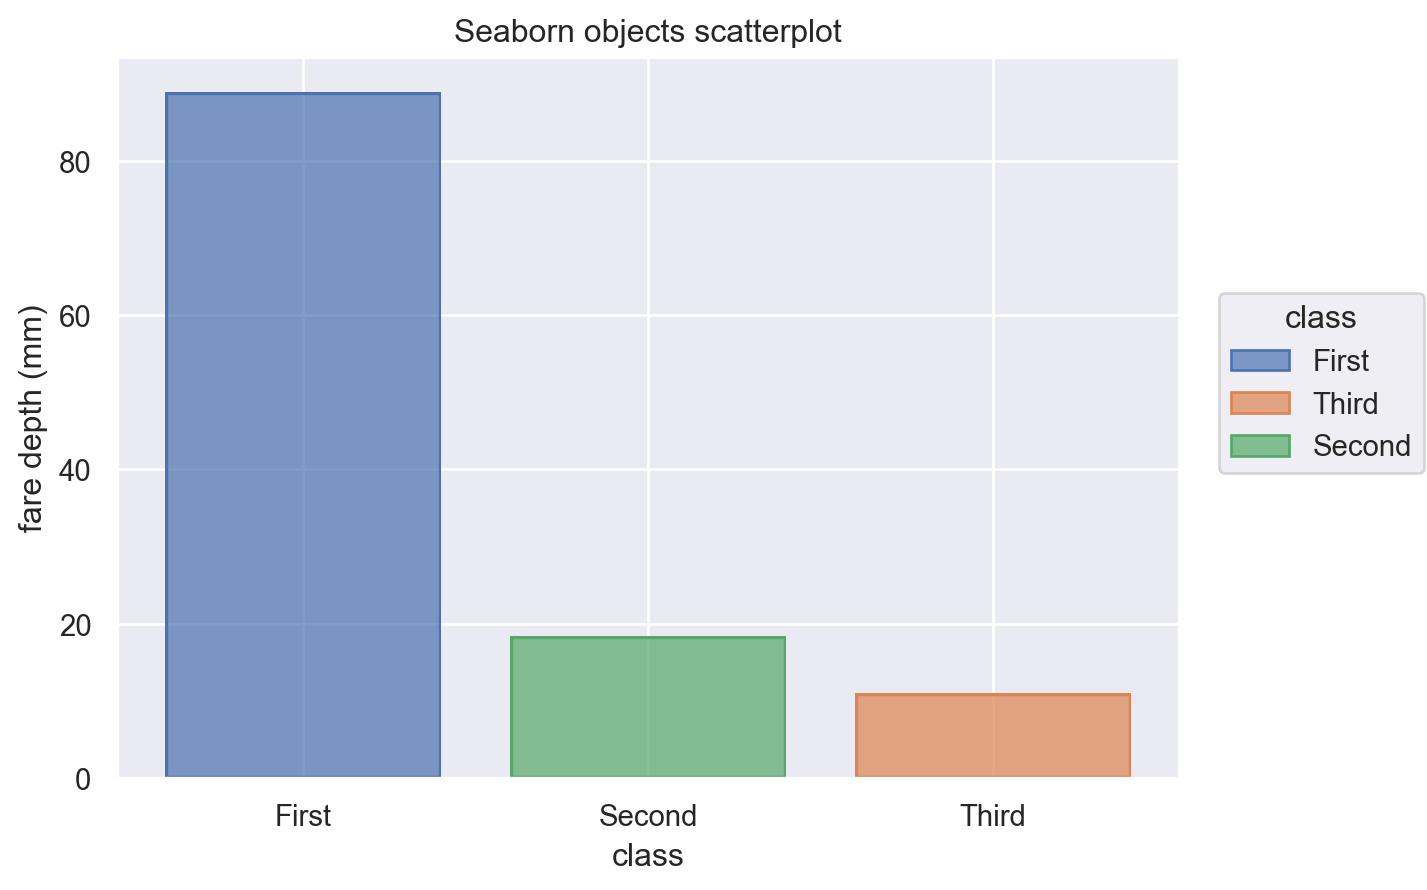

In [42]:
# Seaborn objects barplot
(
    so.Plot(df, x="class", y="fare", color="class")
    .add(so.Bar(), so.Agg())
    .label(
        x="class", y="fare depth (mm)",title="Seaborn objects scatterplot"
    )
)


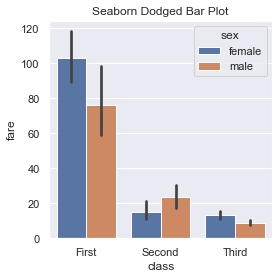

In [74]:
# Using Seaborn barplot

sns.barplot(data=df, x='class',y='fare', hue='sex', dodge=True).set(ylabel="fare", 
                                                                                   title="Seaborn Dodged Bar Plot");


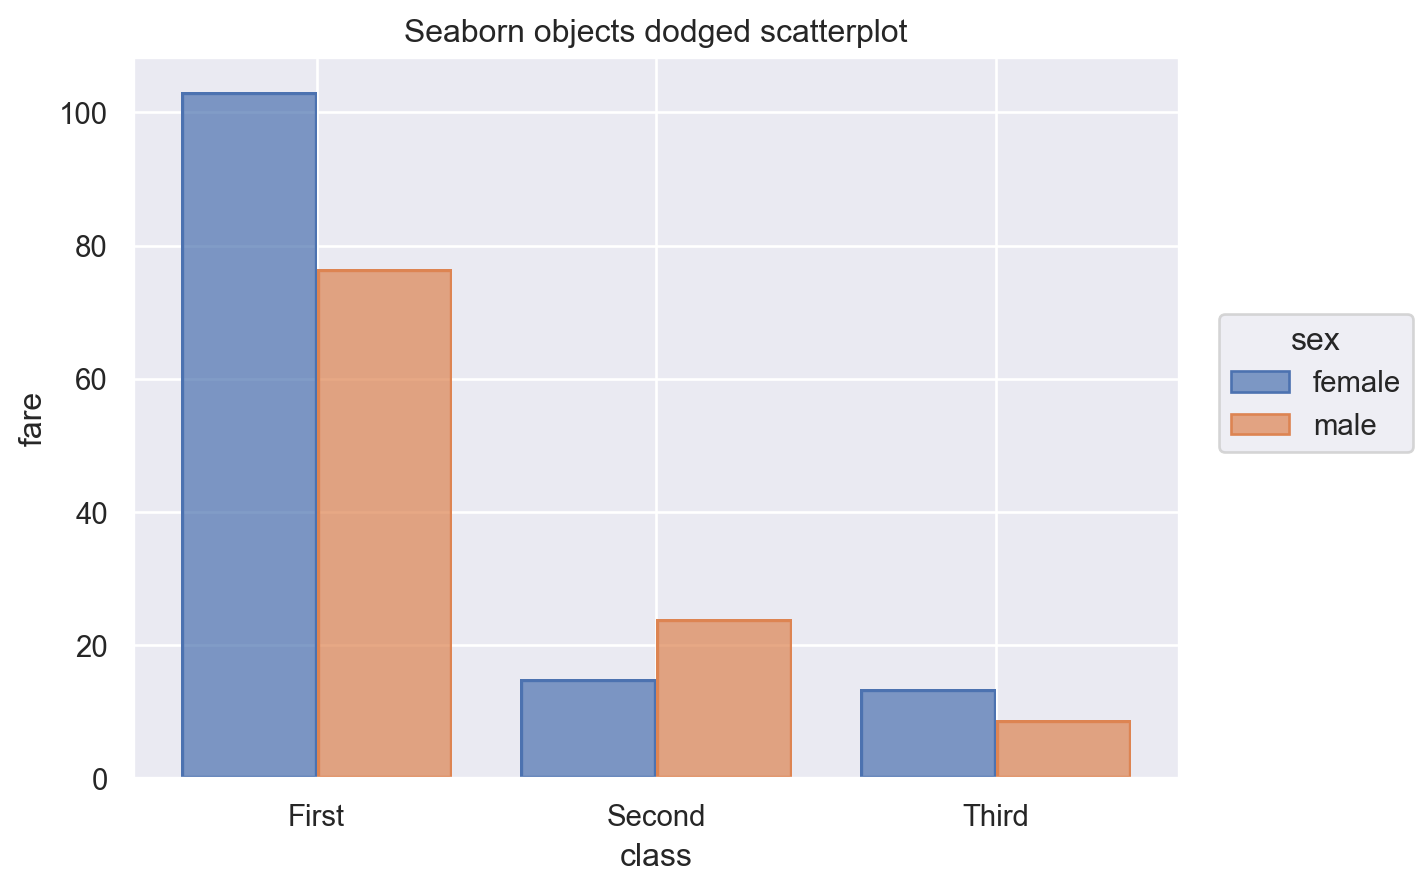

In [44]:
# Seaborn objects barplot
(
    so.Plot(df, x="class", y="fare", color="sex")
    .add(so.Bar(), so.Agg(), so.Dodge())
    .label(
        x="class", y="fare",title="Seaborn objects dodged scatterplot"
    )
)

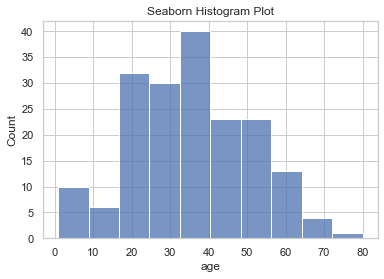

In [45]:
# Seaborn histogram

sns.histplot(df['age']).set(
    xlabel="age", title="Seaborn Histogram Plot");


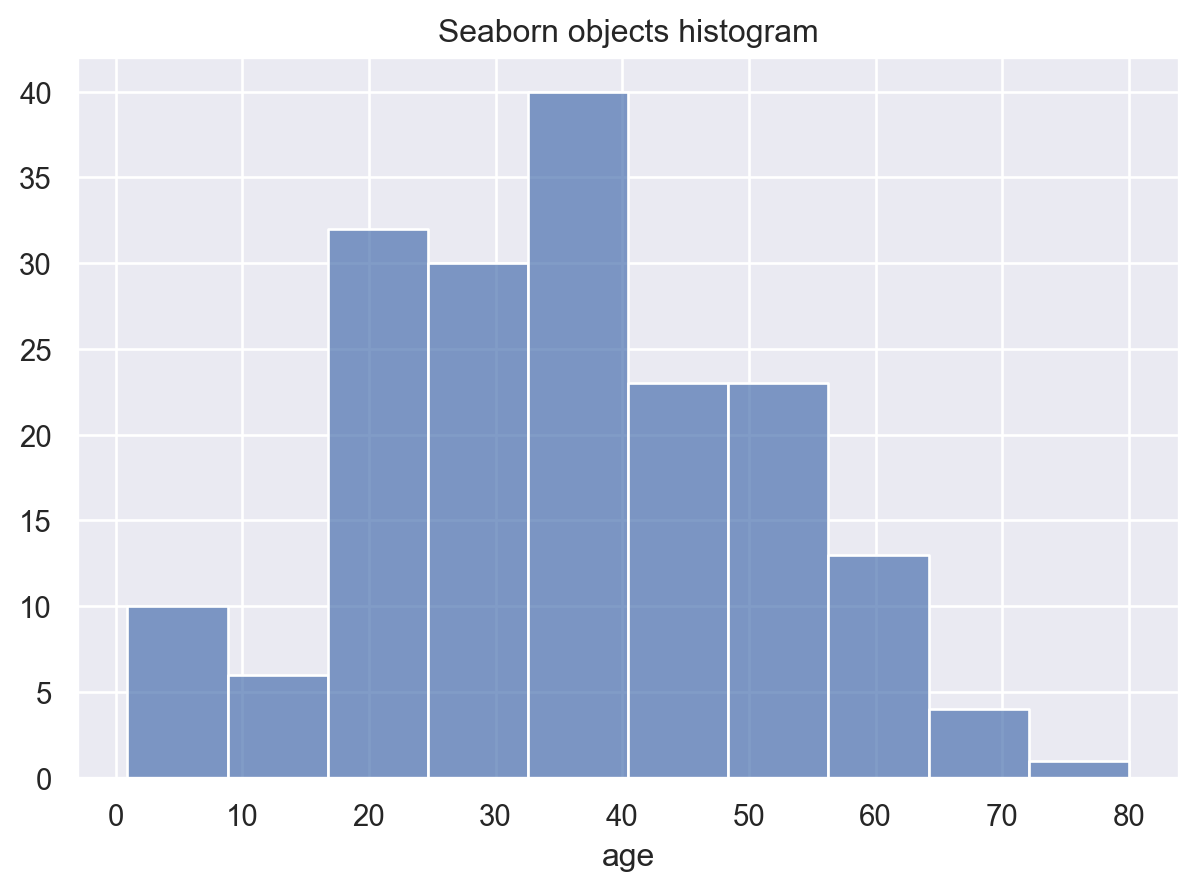

In [46]:
# Seaborn objects histogram

(
    so.Plot(df, x="age")
    .add(so.Bars(), so.Hist()).label(
        x="age",title="Seaborn objects histogram"
    )
)


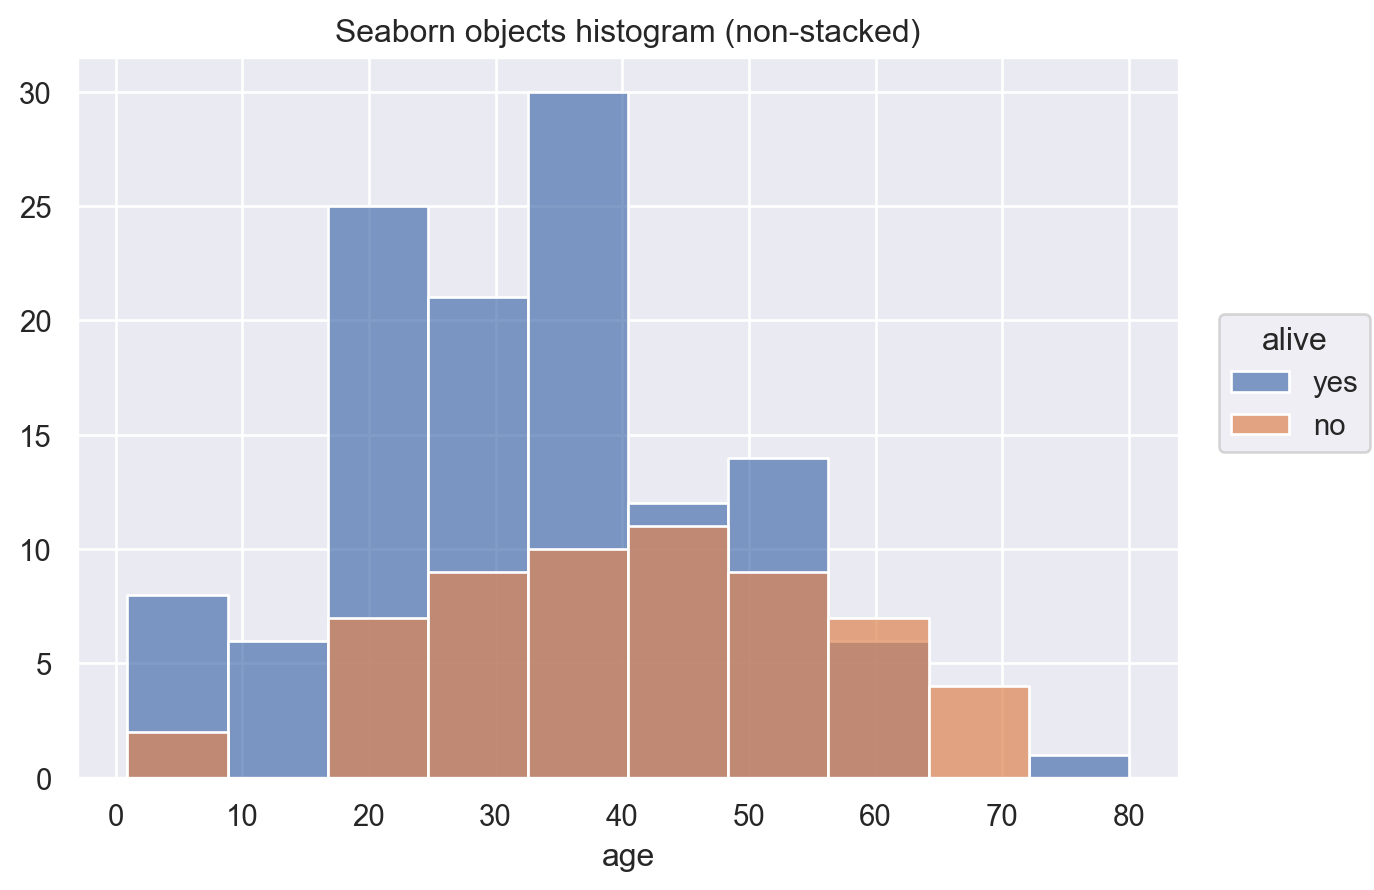

In [47]:
# Define basic plot and add properties
p = so.Plot(df, "age", color="alive")
p.add(so.Bars(), so.Hist()).label(
        x="age",title="Seaborn objects histogram (non-stacked)"
    )

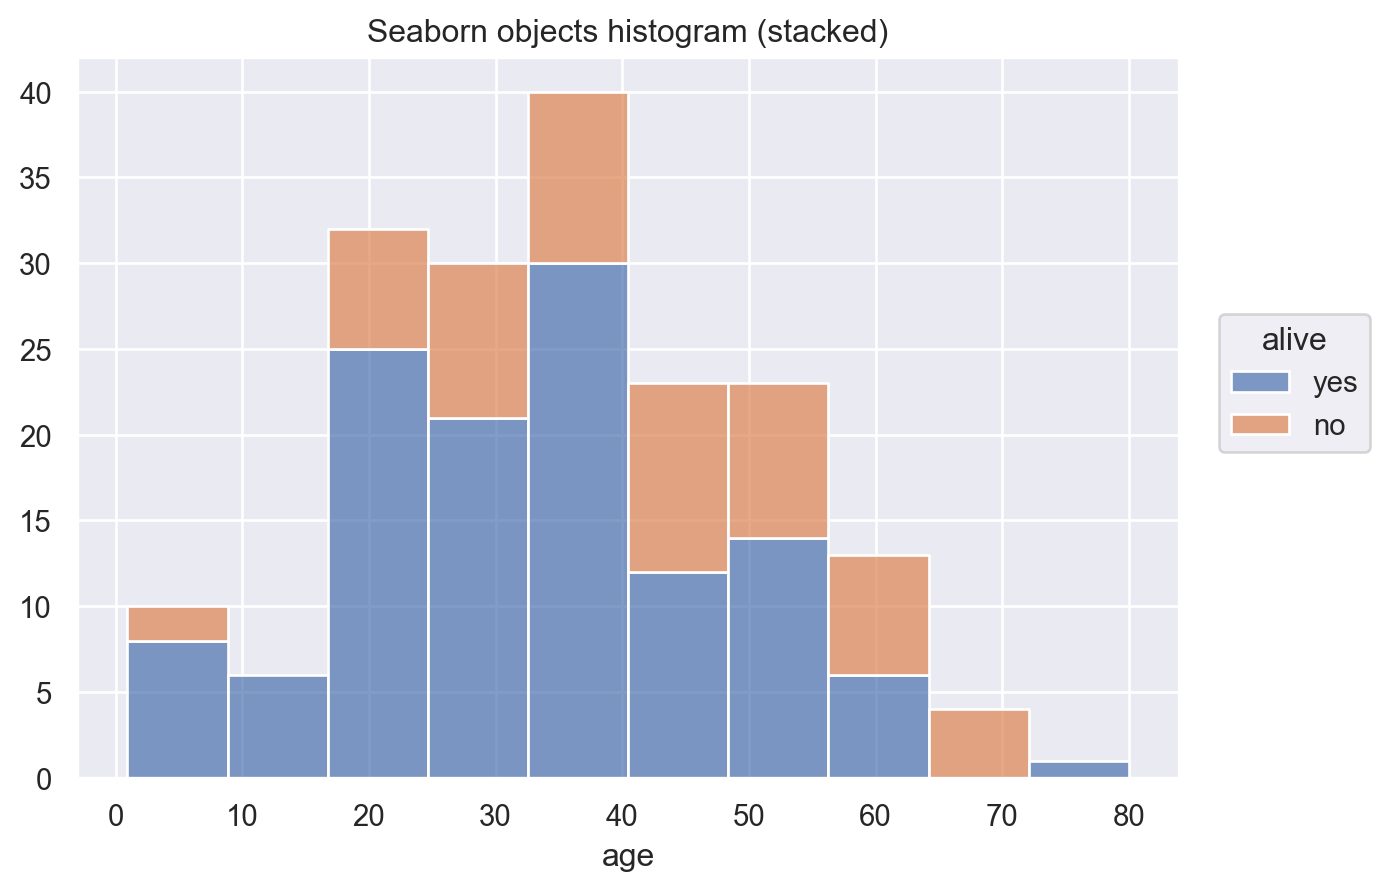

In [49]:
p.add(so.Bars(), so.Hist(), so.Stack(), color="alive").label(
        x="age",title="Seaborn objects histogram (stacked)"
    )

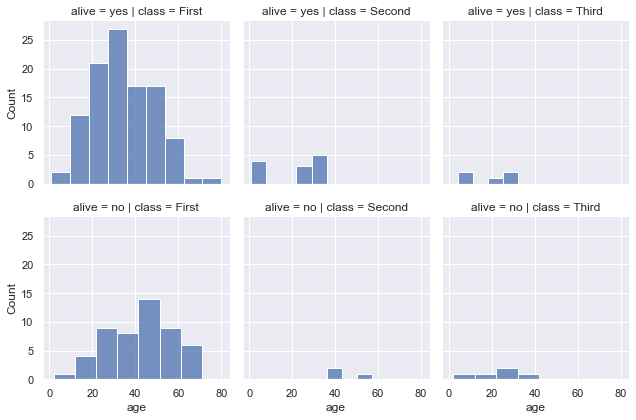

In [50]:
sns.set(rc={"figure.figsize":(4, 4)})
g = sns.FacetGrid(df, col="class",  row="alive")
g.map_dataframe(sns.histplot, x="age");


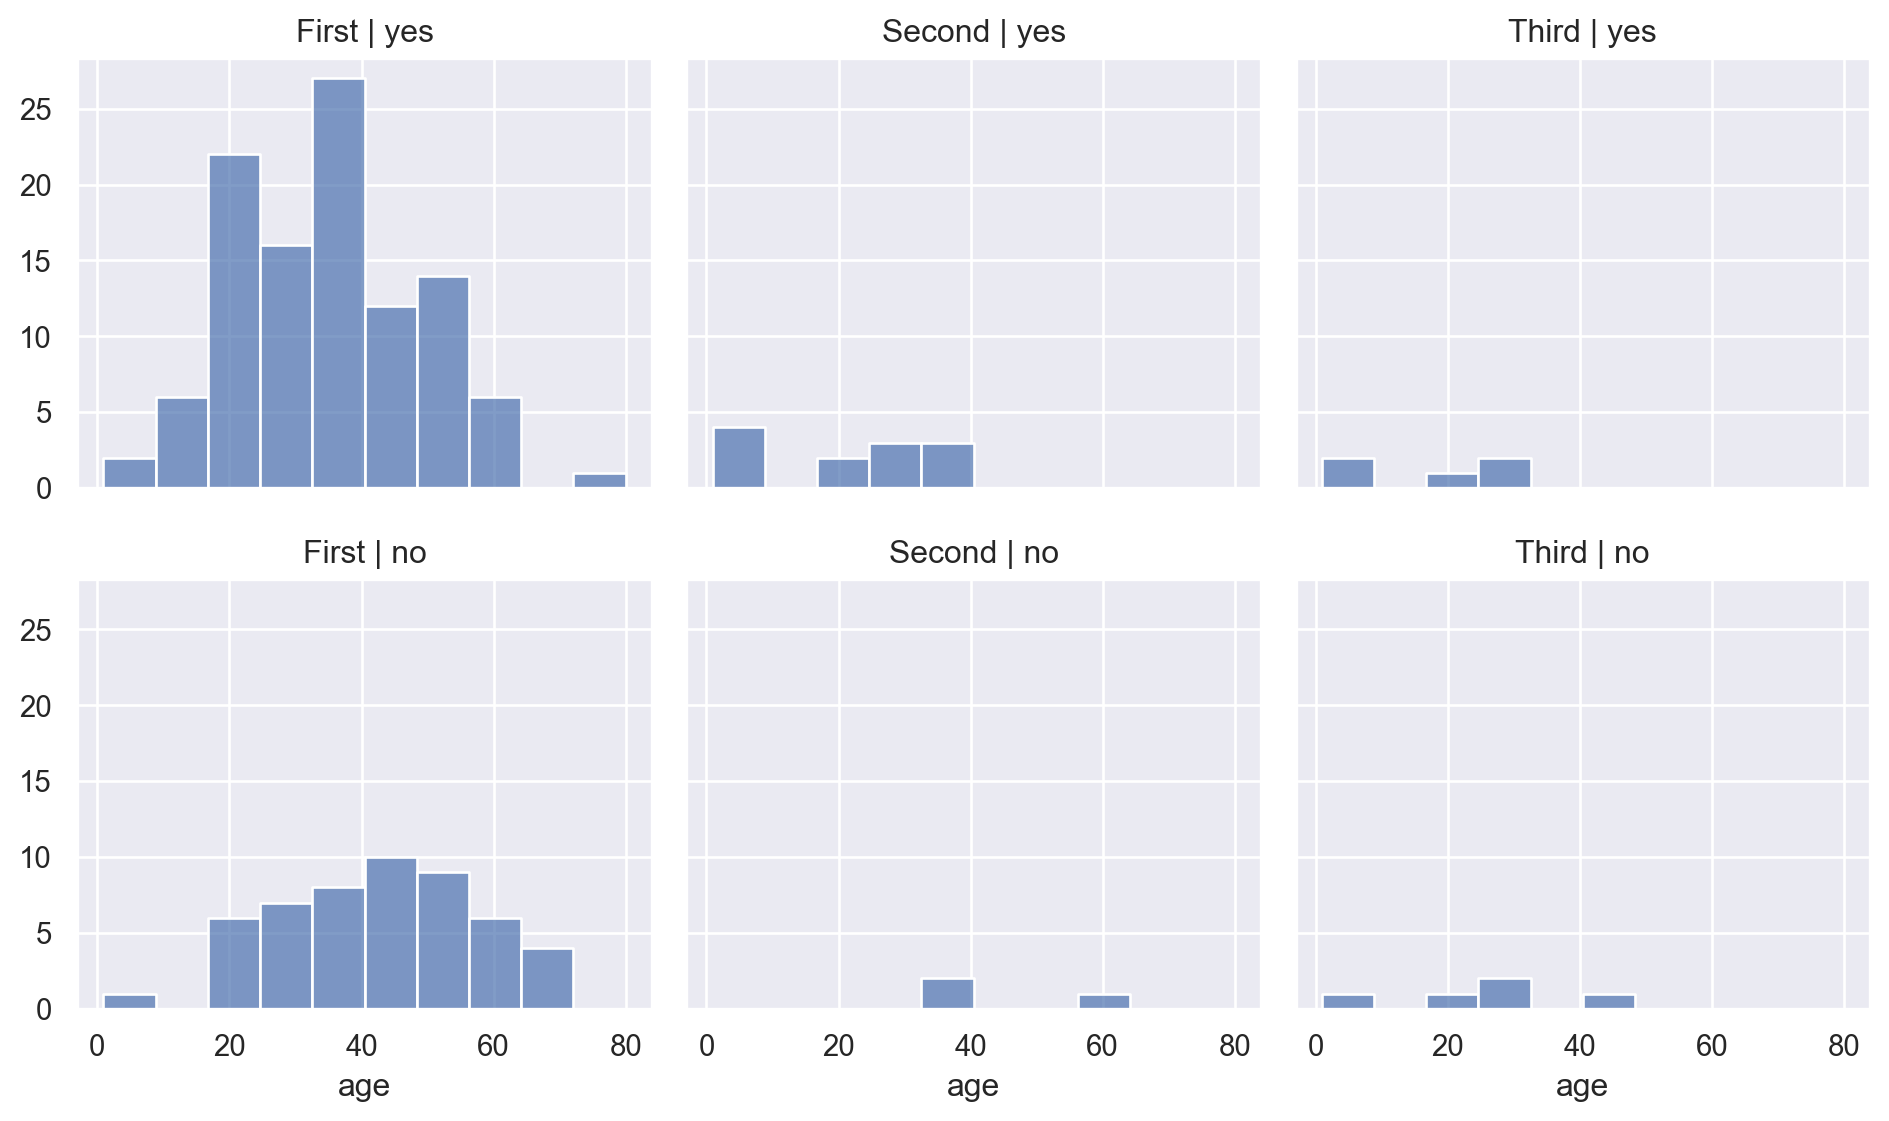

In [51]:
(
    so.Plot(df, x="age")
    .facet(col="class", row="alive")
    .add(so.Bars(), so.Hist()).label(
        x="age"
    ).layout(size=(10, 6))
)


## Not yet implemented in seaborn.objects

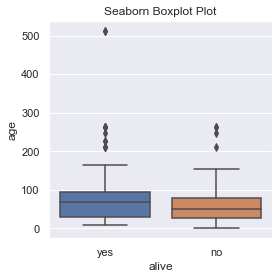

In [75]:
# Seaborn boxplots

sns.boxplot(data=df, x="alive", y="fare").set(
    ylabel="age", title="Seaborn Boxplot Plot");


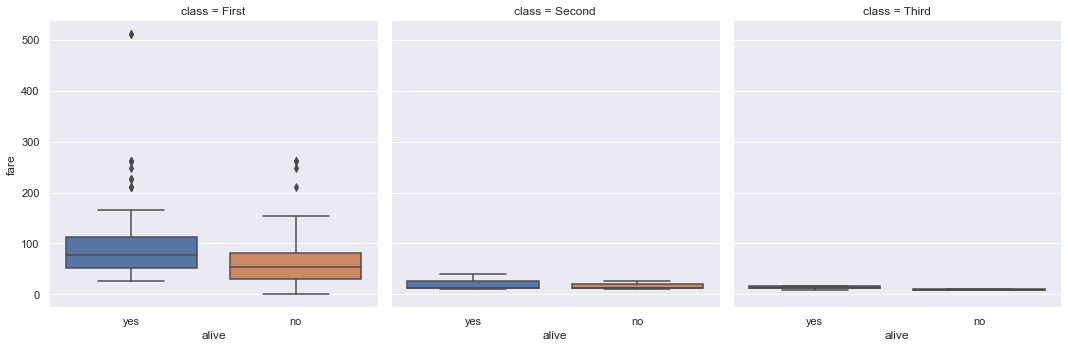

In [76]:
sns.catplot(data=df, x='alive',y='fare', kind='box', col='class');

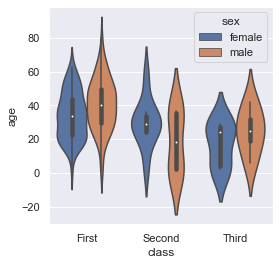

In [54]:
# Seaborn violin plot

sns.violinplot(data=df, x='class', y='age', hue='sex', height=12);

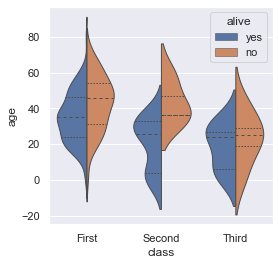

In [58]:
# Seaborn violin plot

sns.violinplot(data=df, x='class', y='age', hue='alive',
               split=True, inner="quart", linewidth=1);

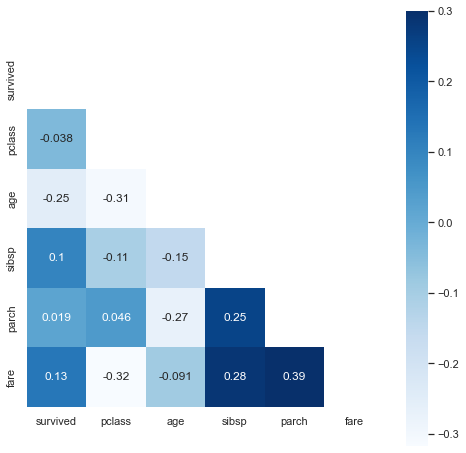

In [59]:
# Seaborn Masked correlation heatmap 
#corr = df.corr()
# Select only numeric columns
corr = df.select_dtypes(include=np.number).corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
  f, ax = plt.subplots(figsize=(8, 8))
  ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True, cmap='Blues');


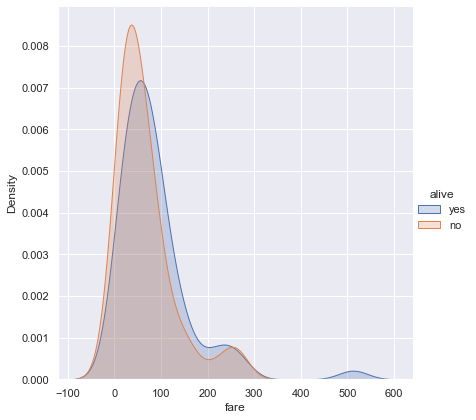

In [60]:
# Seaborn KDE plots

sns.FacetGrid(df, hue="alive", height=6,) \
   .map(sns.kdeplot, "fare", fill=True) \
   .add_legend();


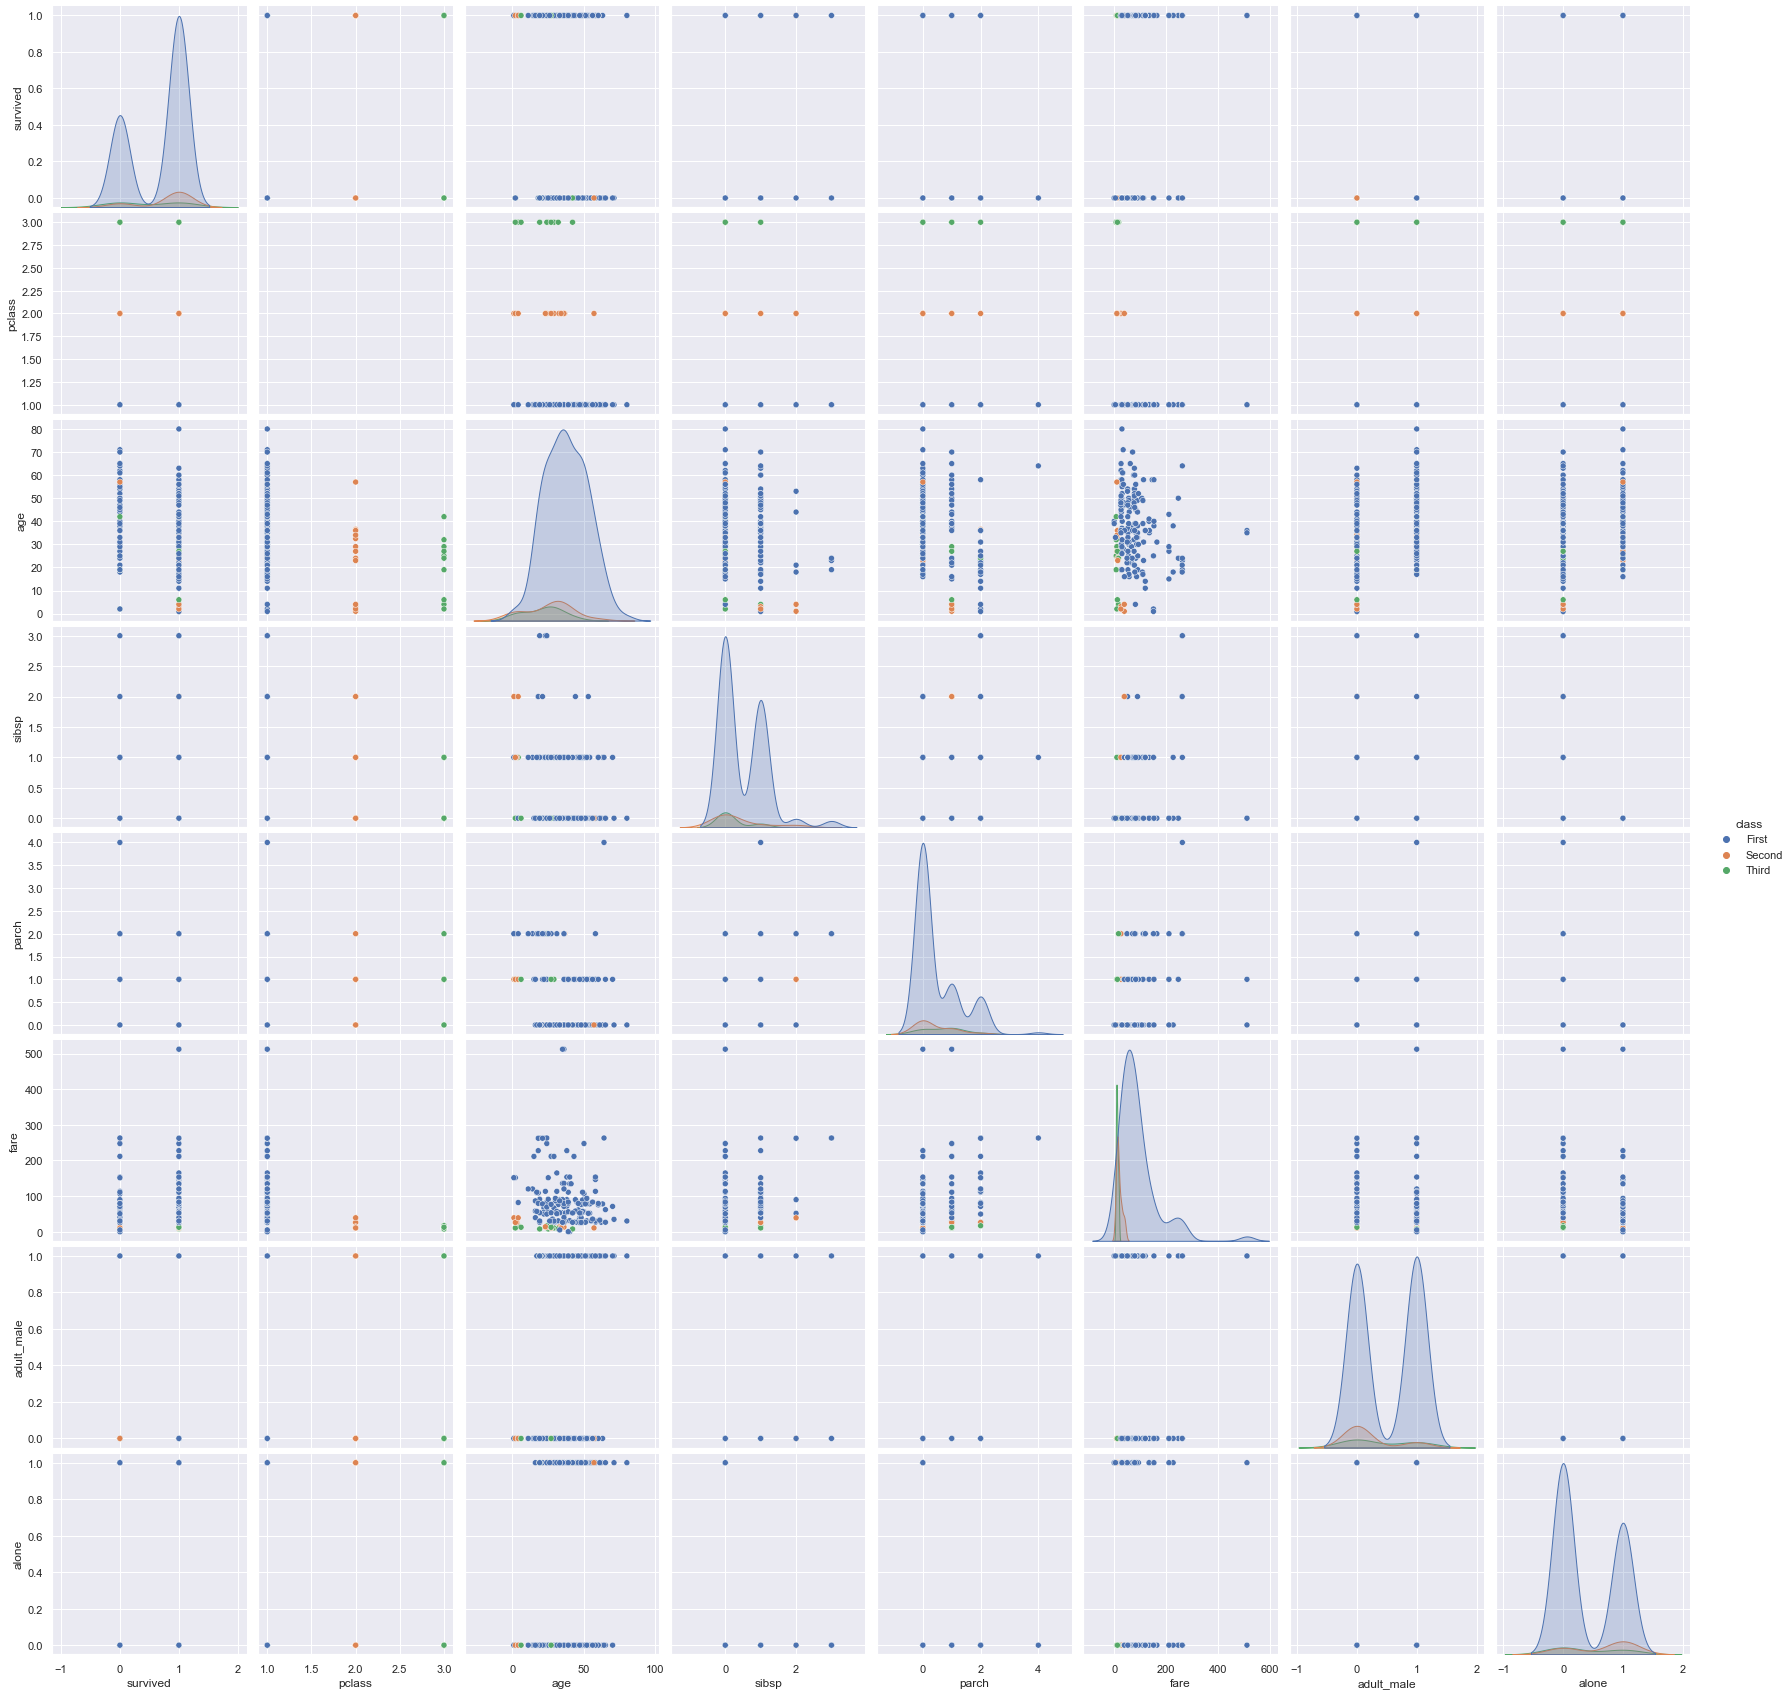

In [62]:
# Seaborn pairplot using KDE plots
sns.pairplot(df, hue='class', height=3);


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


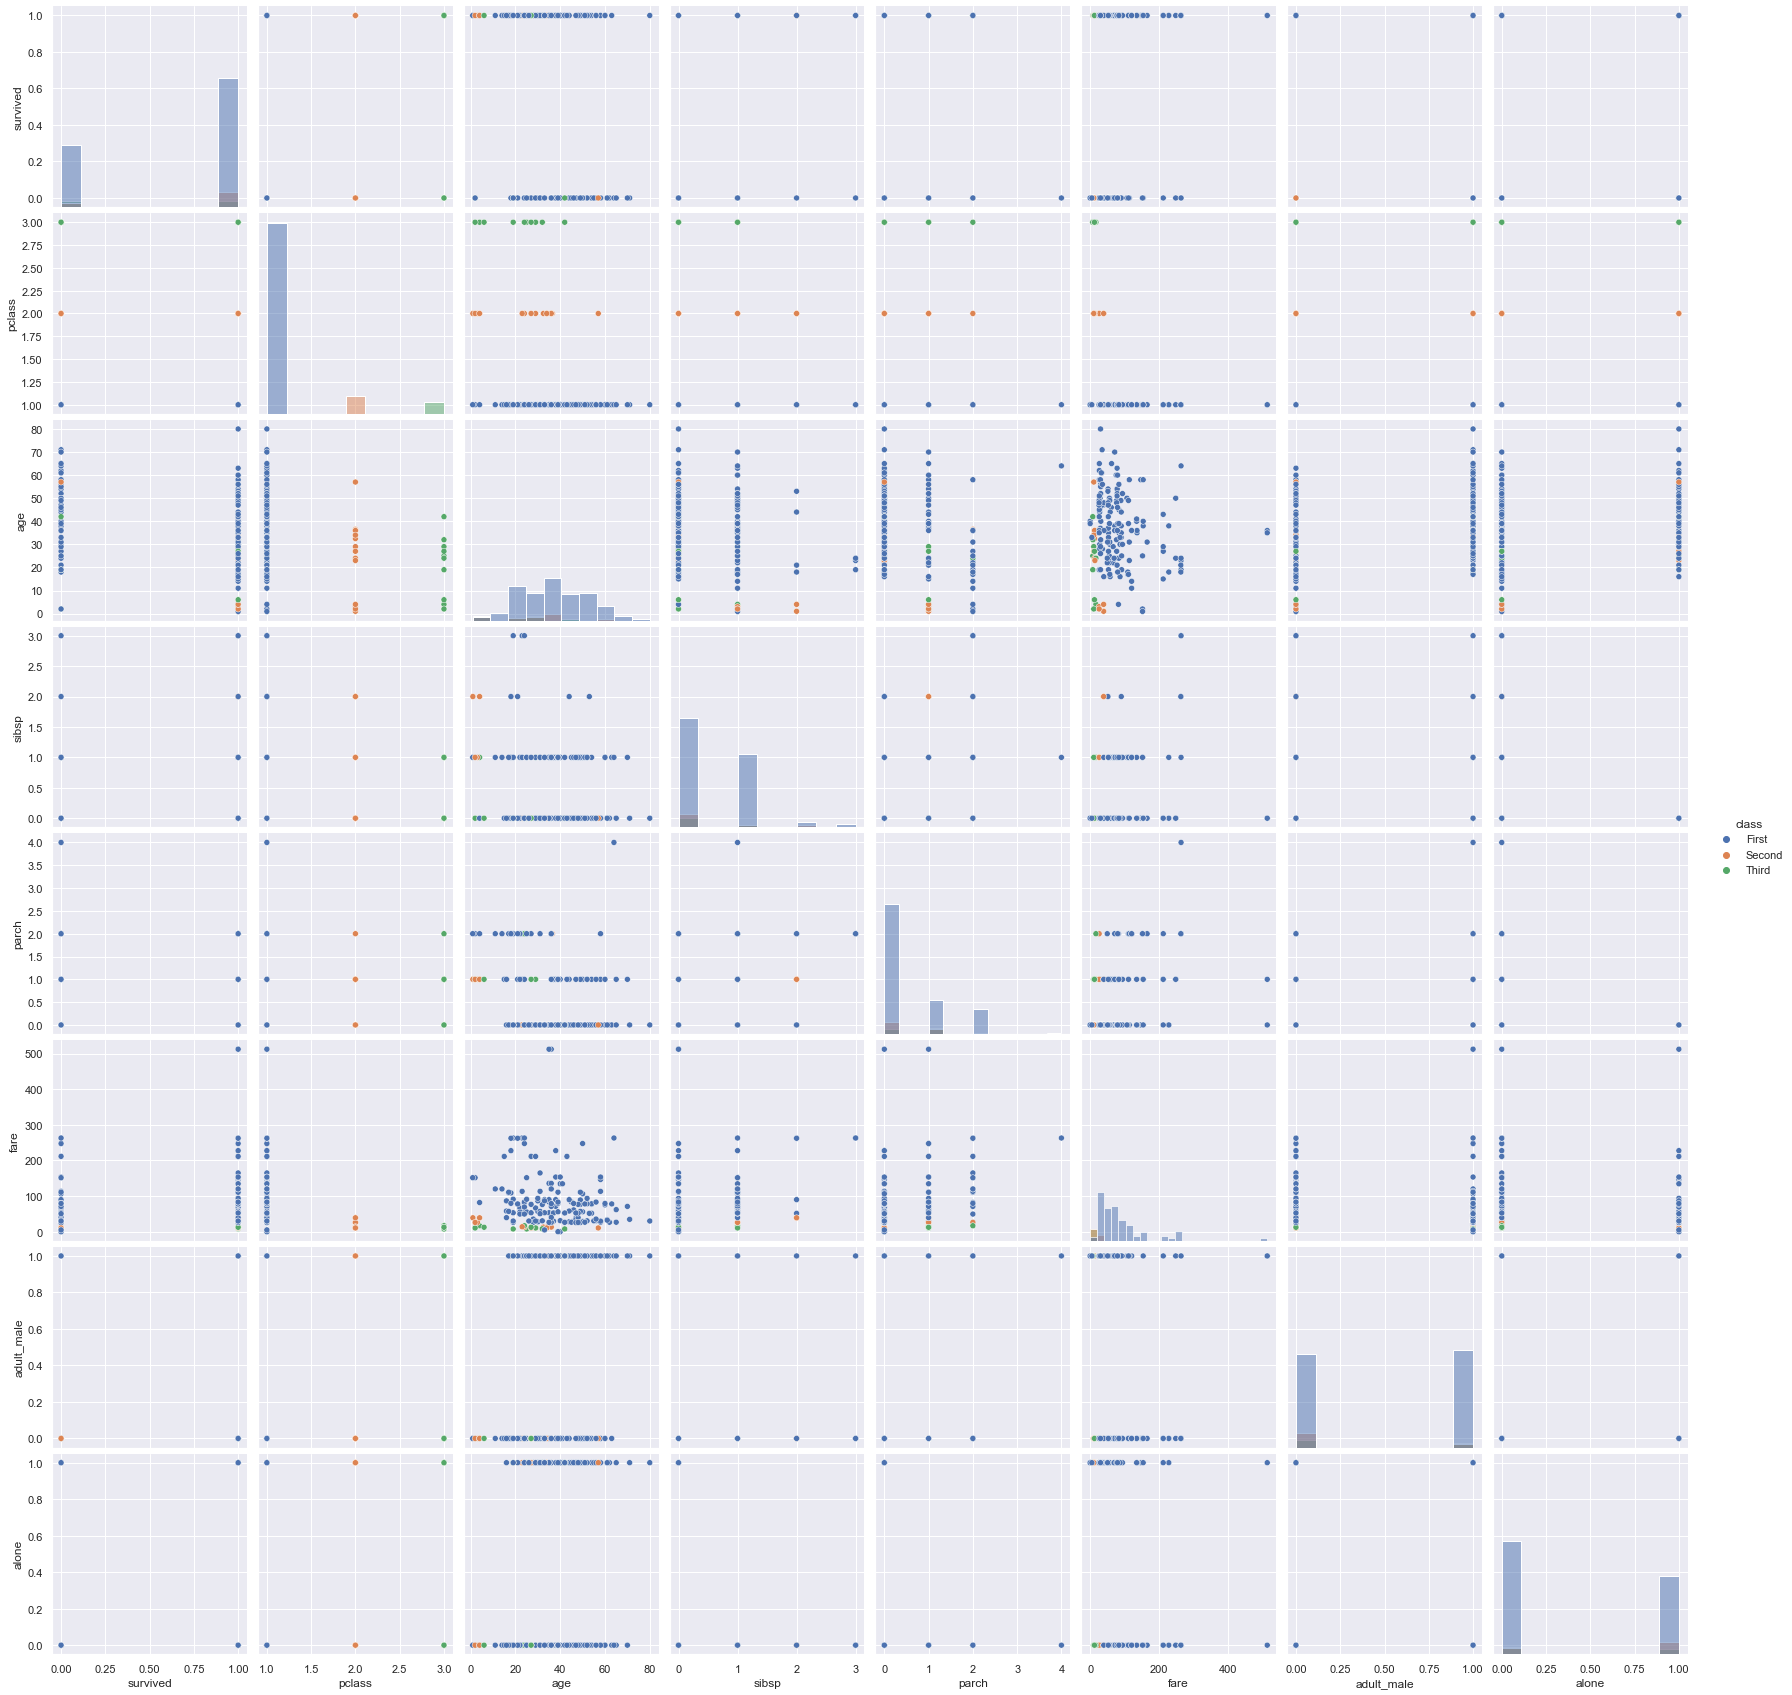

In [63]:
# Pairplot using histograms
sns.pairplot(df, hue="class", height=3, diag_kind="hist");

Making additional plots

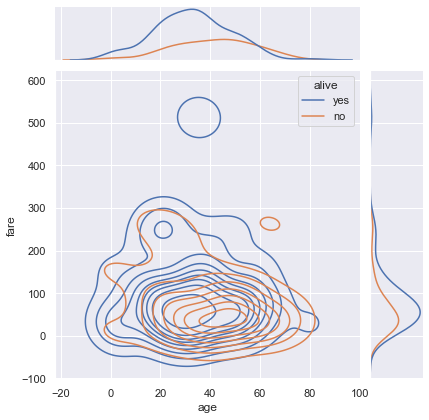

In [72]:
# Show the joint distribution using kernel density estimation
g = sns.jointplot(
    data=df,
    x="age", y="fare", hue="alive",
    kind="kde",
)

[Text(5.5, 0.5, '')]

C:\Users\klmartinez\Anaconda3\lib\site-packages\seaborn\categorical.py:3540: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


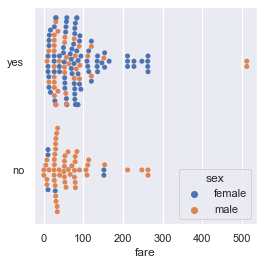

In [78]:
# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=df, x="fare", y="alive", hue="sex")
ax.set(ylabel="")


# Summary Description

Because the code was already set up, using Seaborn to plot was relativley easy. It was also relatively easy to try new plots due to the excellent [documentation](http://seaborn.pydata.org/examples/index.html) proved by Seaborn. 

However, I predict it would be challenging for me to perform further customization especially since I am still learning Python. 

I will definitley be using Seaborn in my projects in place of ggplots from R even though I like both languages. 